### Loading the data

In [9]:
import numpy as np
import pandas as pd 

In [1]:
pd.set_option('display.max_colwidth',100)
df = pd.read_csv("train.csv") 
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


### knowing the data 

In [2]:
df_test = pd.read_csv("test.csv") 
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [5]:
df.iloc[1,3]


'Forest fire near La Ronge Sask. Canada'

In [6]:
shape = df.shape
print(shape)

(7613, 5)


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of disaster tweets and non disaster tweets')

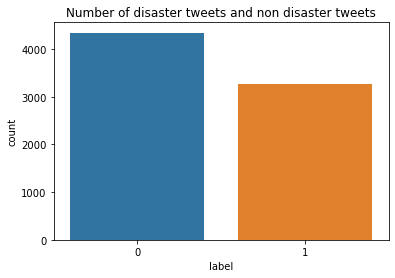

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df.target)
plt.xlabel('label')
plt.title('Number of disaster tweets and non disaster tweets')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each tweet')

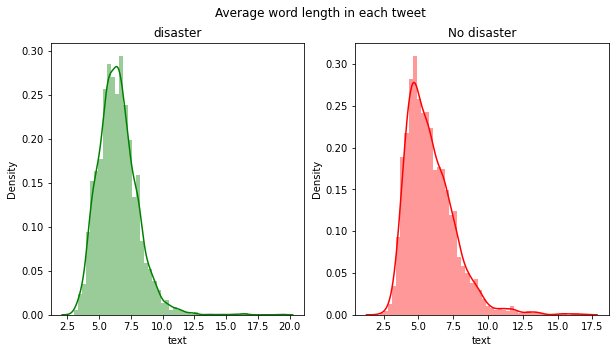

In [15]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df[df['target']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='Green')
ax1.set_title('disaster')
word=df[df['target']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='Red')
ax2.set_title('No disaster')
fig.suptitle('Average word length in each tweet')

## Data Preprocessing

### Handle Possible Duplicates

In [16]:
df = df.drop([ 'id', 'keyword', 'location'], axis=1)

In [17]:
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or...,1
3,"13,000 people receive #wildfires evacuation orders in California",1
4,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [18]:
df['text'].describe(include='all')

count                                                                                                    7613
unique                                                                                                   7503
top       11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charge...
freq                                                                                                       10
Name: text, dtype: object

In [19]:
df.drop_duplicates(['text'], inplace=True)


In [20]:
df['text'].describe(include='all')

count                    7503
unique                   7503
top       @Scalpium SCREAMING
freq                        1
Name: text, dtype: object

According to the codes above, 110 duplicate texts are deleted from the df.

### Drop NaN

In [22]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7503 entries, 0 to 7612
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7503 non-null   object
 1   target  7503 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 175.9+ KB


we need to clean-up the text to improve any clustering or classification efforts. First, let's drop Null vales:

### Remove HTML Marks

In [29]:
# Via the first regex, <[^>]*>, in the preceding code section, we tried to remove all of the HTML markup from the text.
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',text)
    text = (re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', ''))
    return text
df["text"]=df["text"].apply(lambda x: preprocessor(x))
df["text"]

0                                      our deeds are the reason of this earthquake may allah forgive us all
1                                                                     forest fire near la ronge sask canada
2       all residents asked to shelter in place are being notified by officers no other evacuation or sh...
3                                          13 000 people receive wildfires evacuation orders in california 
4                    just got sent this photo from ruby alaska as smoke from wildfires pours into a school 
                                                       ...                                                 
7604     worldnews fallen powerlines on g link tram update fire crews have evacuated up to 30 passengers...
7605    on the flip side i m at walmart and there is a bomb and everyone had to evacuate so stay tuned i...
7606    suicide bomber kills 15 in saudi security site mosque reuters via world google news wall http t ...
7608                      tw

In [30]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [31]:
import nltk
from nltk.stem import PorterStemmer
ps=PorterStemmer()
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [33]:
import string
stop=nltk.corpus.stopwords.words('english')
print(len(stop))
string.punctuation
print(len(string.punctuation))

179
32


In [34]:
def clean_text(txt):
    txt= "".join([c for c in txt if c not in string.punctuation])
    tokens=re.split('\W+',txt)
    txt=[ps.stem(word) for word in tokens if word not in stop]
    return txt

In [35]:
df["txt_clean"]=df["text"].apply(lambda x : clean_text(x))
df.head()

,text,target,txt_clean
0,our deeds are the reason of this earthquake may allah forgive us all,1,"[deed, reason, earthquak, may, allah, forgiv, us]"
1,forest fire near la ronge sask canada,1,"[forest, fire, near, la, rong, sask, canada]"
2,all residents asked to shelter in place are being notified by officers no other evacuation or sh...,1,"[resid, ask, shelter, place, notifi, offic, evacu, shelter, place, order, expect]"
3,13 000 people receive wildfires evacuation orders in california,1,"[13, 000, peopl, receiv, wildfir, evacu, order, california, ]"
4,just got sent this photo from ruby alaska as smoke from wildfires pours into a school,1,"[got, sent, photo, rubi, alaska, smoke, wildfir, pour, school, ]"


In [36]:
shape = df.shape
print(shape)

(7503, 3)


## Vectorising

## Feature Enginearing
Power transformatios
standardizing data 
Normalization: bring different features to similar scale

In [38]:
df["len_text"]=df["text"].apply(lambda x: len(x))
df.head()

,text,target,txt_clean,len_text
0,our deeds are the reason of this earthquake may allah forgive us all,1,"[deed, reason, earthquak, may, allah, forgiv, us]",68
1,forest fire near la ronge sask canada,1,"[forest, fire, near, la, rong, sask, canada]",37
2,all residents asked to shelter in place are being notified by officers no other evacuation or sh...,1,"[resid, ask, shelter, place, notifi, offic, evacu, shelter, place, order, expect]",130
3,13 000 people receive wildfires evacuation orders in california,1,"[13, 000, peopl, receiv, wildfir, evacu, order, california, ]",64
4,just got sent this photo from ruby alaska as smoke from wildfires pours into a school,1,"[got, sent, photo, rubi, alaska, smoke, wildfir, pour, school, ]",86


In [ ]:
# Puncuatiom usage

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
tfidf_vect=TfidfVectorizer()
cv1=CountVectorizer(analyzer=clean_text)
x= cv1. fit_transform(df["txt_clean"])

In [40]:
print(x.shape)

(7503, 7486)


In [41]:
df1=pd.DataFrame(x.toarray(),columns=cv1.get_feature_names())
df1.head(5)

,030811policstop41yearoldbronxcitecasevictimlocatweaponfound,08062015alabamaquakseismicsummariwearthquaknewsamphistorihttpcozm6vczqvwkhttpcodknlznom6n,08315catfataluticanypleasantamphollandaveblackcatwhitepawaveragsizegrassnextnorthsideroad,0913pmhazardweatheroutlookhttpcoed1vpitswihazardweatherexpecttimehttpco6xsbddlziy,0daybugfullipatchosxcomeactivexploitbypasspasswordartechnicahttpco53p4ooo1xn,0daybugfullipatchosxcomeactivexploitbypasspasswordartechnicahttpcof7ogzrnpfv,0daybugfullipatchosxcomeactivexploithijackmachttpcosbgirvqvzb,0npzpmhtw4fnetofficialabamahomequarantinpossiblebolacaseabcnew,0photolastmaofficichallengpolicdrivetrafficlagohttpco8vzsftr1bg,1001mixnewflatdoublsidelinerlessbottlcapchoosmixflattenfullûhttpcow00kjprfdrhttpcomixl1pfrj,...,ûïrichmondcoachdevastheardeathseconddrivermrchancsitûjamhttpcoy5yhbb0hkf,ûïsplottdavteampalestina28700palestinianhomedemolishisraelsinc1967w0israhomedemolishpotu,ûïstretcher5minspeakerdeckûhttpco7qpg80ud7v,ûïstretcher5minspeakerdeckûhttpcofblnifda1c,ûïthehighfessfriendcameschoolblastaskhighsaidpancakcollapsiowacitihighû,ûïtheroadpowerpavehypocrisicasualtiûfrancisunderwoodhochttpcozqo6nuvytu,ûïymcglaunjuliekragtwildwestsixgunlotsaferwayûyeahlotstablampgettroublseatright,ûïyouseedevastampûªshockûïfirefightcontinubattlflamecaliforniabenstracireportû,ûóbulletproofblacklikefunerworldaroundusburncoldhttpcouqssnaattu,ûûlostampalonsinklikestonecarrionåå
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
print(CountVectorizer)

<class 'sklearn.feature_extraction.text.CountVectorizer'>


In [43]:
df2 = pd.read_csv("train.csv") 

In [44]:
X_train = df2.loc[:5000, 'text'].values
y_train = df2.loc[:5000, 'target'].values
X_test = df2.loc[5000:, 'text'].values
y_test = df2.loc[5000:, 'target'].values

In [45]:
def tokenizer(text):
    return text.split()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [46]:
# Using grid search to find the best estimator and hyperparameters
# Using logistic regression to solve classification problem
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [1.0, 10.0, 100.0]},
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', LogisticRegression(random_state=0, solver='liblinear'))])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

In [47]:
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  1.4min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf',
                                        LogisticRegression(random_state=0,
                                                           solver='liblinear'))]),
             n_jobs=-1,
             param_grid=[{'clf__C': [1.0, 10.0, 100.0],
                          'clf__penalty': ['l1', 'l2'],
                          'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've...
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
 

In [48]:
# Best parameter set
print('Best parameter set: %s ' % gs_lr_tfidf.best_params_)
print('CV Accuracy: %.3f' % gs_lr_tfidf.best_score_)

Best parameter set: {'clf__C': 1.0, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer at 0x00000143E92A6CA0>} 
CV Accuracy: 0.714


In [49]:
# Fiting with the best parameters
clf = gs_lr_tfidf.best_estimator_
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

Test Accuracy: 0.740


In [50]:
from sklearn.linear_model import LogisticRegression
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

np.random.seed(0)
np.set_printoptions(precision=6)
y = [np.random.randint(3) for i in range(25)]
X = (y + np.random.randn(25)).reshape(-1, 1)

cv5_idx = list(StratifiedKFold(n_splits=5, shuffle=False).split(X, y))
    
lr = LogisticRegression(random_state=123, multi_class='ovr', solver='lbfgs')
cross_val_score(lr, X, y, cv=cv5_idx)

array([0.4, 0.2, 0.6, 0.2, 0.4])

In [51]:
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(solver='lbfgs', multi_class='ovr', random_state=1)
gs = GridSearchCV(lr, {}, cv=cv5_idx, verbose=3).fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV]  ................................................................
[CV] .................................... , score=0.400, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.200, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.600, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.200, total=   0.0s
[CV]  ................................................................
[CV] .................................... , score=0.400, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [52]:
gs.best_score_

0.36000000000000004

In [53]:
lr = LogisticRegression(solver='lbfgs', multi_class='ovr', random_state=1)
cross_val_score(lr, X, y, cv=cv5_idx).mean()

0.36000000000000004

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=False,
                        preprocessor=None)

param_grid = [{'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               
               },
              {'vect__ngram_range': [(1, 1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer, tokenizer_porter],
               'vect__use_idf':(True, False),
               'vect__norm':[None],
             },
              ]

lr_tfidf = Pipeline([('vect', tfidf),
                     ('clf', SVC ())])

gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)



In [56]:
X_train = df2.loc[:5000, 'text'].values
y_train = df2.loc[:5000, 'target'].values
X_test = df2.loc[5000:, 'text'].values
y_test = df2.loc[5000:, 'target'].values

In [57]:
gs_lr_tfidf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   42.1s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vect',
                                        TfidfVectorizer(lowercase=False)),
                                       ('clf', SVC())]),
             n_jobs=-1,
             param_grid=[{'vect__ngram_range': [(1, 1)],
                          'vect__stop_words': [['i', 'me', 'my', 'myself', 'we',
                                                'our', 'ours', 'ourselves',
                                                'you', "you're", "you've",
                                                "you'll", "you'd", 'your',
                                                'yours', 'yourself',
                                                'yourselves', 'he', 'him',
                                                'his', 'himself', 'she',
                                                "she's", 'h...
                                                'our', 'ours', 'ourselves',
                                                'you', "y

In [58]:
clf = gs_lr_tfidf.best_estimator_
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))

Test Accuracy: 0.744


In [59]:
predictions=clf.predict(df_test.iloc[:,3])


In [60]:
predictions

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

In [61]:
X_train = df2.loc[:5000, 'text'].values
y_train = df2.loc[:5000, 'target'].values
X_test = df2.loc[5000:, 'text'].values
y_test = df2.loc[5000:, 'target'].values

In [62]:
from sklearn.metrics import confusion_matrix
#clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[1285  151]
 [ 519  658]]


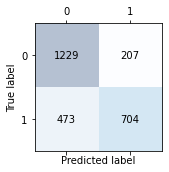

In [157]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

In [64]:
# Make a submission dataframe
#submit = df_test[df_test.iloc[:,3]]
df_test['TARGET'] = predictions
# Save the submission dataframe
df_test.head(10)

,id,keyword,location,text,TARGET
0,0,NaN,NaN,Just happened a terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone.",0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1
5,12,NaN,NaN,We're shaking...It's an earthquake,1
6,21,NaN,NaN,"They'd probably still show more life than Arsenal did yesterday, eh? EH?",0
7,22,NaN,NaN,Hey! How are you?,0
8,27,NaN,NaN,What a nice hat?,0
9,29,NaN,NaN,Fuck off!,0


In [65]:
# Save the submission dataframe
df_test.to_csv('Submision.csv', index = False)

In [66]:

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

lr = make_pipeline(LogisticRegression(solver='lbfgs', multi_class='ovr', random_state=1))

gs_lr = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

In [67]:

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

lr = make_pipeline(LogisticRegression(solver='lbfgs', multi_class='ovr', random_state=1))

gs_lr = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

In [136]:
# Checking the submission
submit_file = pd.read_csv('Submision.csv')
print('Testing data shape: ', submit_file.shape)
submit_file.head(10)

Testing data shape:  (3263, 5)


,id,keyword,location,text,TARGET
0,0,NaN,NaN,Just happened a terrible car crash,1
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone.",0
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,0
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,1
5,12,NaN,NaN,We're shaking...It's an earthquake,1
6,21,NaN,NaN,"They'd probably still show more life than Arsenal did yesterday, eh? EH?",0
7,22,NaN,NaN,Hey! How are you?,0
8,27,NaN,NaN,What a nice hat?,0
9,29,NaN,NaN,Fuck off!,0
